In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: ETH-USD
Start: 2021-01-22 18:00:00+00:00, End: 2021-03-22 14:30:00+00:00
Training data: 1337 
Tsesting data: 1337 


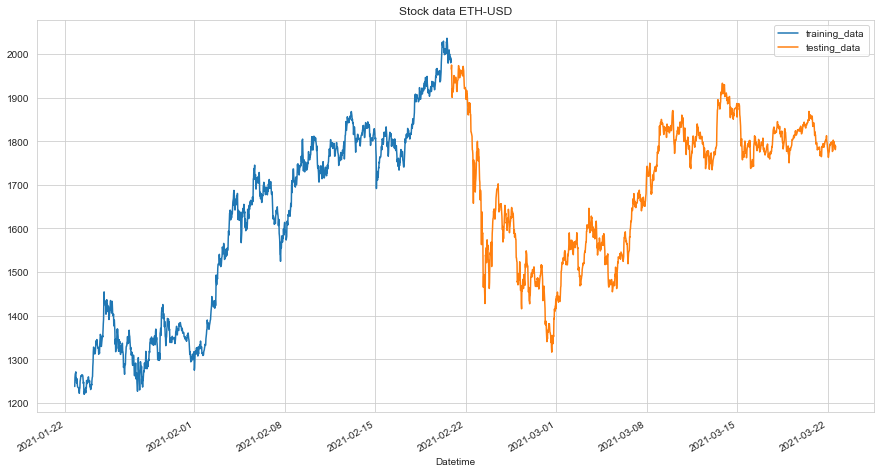

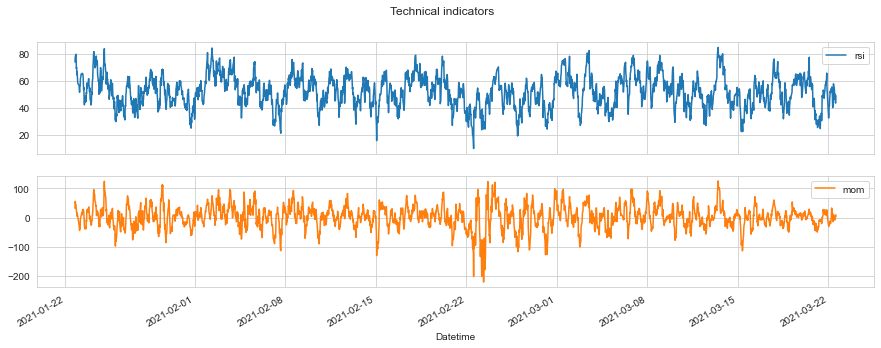

In [2]:
stock_name = 'eth-usd'.upper()
industry = 'Cryptocurrency'
stock_data = pd.read_csv(f'data/{stock_name}.csv', index_col=['Datetime'], parse_dates=True)
n_train = len(stock_data)//2

train_data = stock_data.iloc[:n_train]
test_data = stock_data.iloc[n_train:]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1190.11, duration: 0:00:00.322070
episode: 2/2000, episode end value: 1180.27, duration: 0:00:00.315074
episode: 3/2000, episode end value: 1184.56, duration: 0:00:00.317067
episode: 4/2000, episode end value: 1184.13, duration: 0:00:00.315076
episode: 5/2000, episode end value: 1184.51, duration: 0:00:00.320065
episode: 6/2000, episode end value: 1184.05, duration: 0:00:00.309069
episode: 7/2000, episode end value: 1185.50, duration: 0:00:00.307070
episode: 8/2000, episode end value: 1182.61, duration: 0:00:00.323920
episode: 9/2000, episode end value: 1185.71, duration: 0:00:00.323074
episode: 10/2000, episode end value: 1183.30, duration: 0:00:00.327070
episode: 11/2000, episode end value: 1184.95, duration: 0:00:00.326919
episode: 12/2000, episode end value: 1183.07, duration: 0:00:00.318126
episode: 13/2000, episode end value: 1182.93, duration: 0:00:00.315154
episode: 14/2000, episode end value: 1186.40, duration: 0:00:00.320368
episode: 15/200

episode: 117/2000, episode end value: 1194.91, duration: 0:00:00.330071
episode: 118/2000, episode end value: 1193.58, duration: 0:00:00.307068
episode: 119/2000, episode end value: 1192.58, duration: 0:00:00.319073
episode: 120/2000, episode end value: 1195.39, duration: 0:00:00.313072
episode: 121/2000, episode end value: 1189.91, duration: 0:00:00.319071
episode: 122/2000, episode end value: 1205.42, duration: 0:00:00.342077
episode: 123/2000, episode end value: 1213.77, duration: 0:00:00.321069
episode: 124/2000, episode end value: 1191.12, duration: 0:00:00.319072
episode: 125/2000, episode end value: 1189.91, duration: 0:00:00.363082
episode: 126/2000, episode end value: 1188.99, duration: 0:00:00.328071
episode: 127/2000, episode end value: 1195.68, duration: 0:00:00.348084
episode: 128/2000, episode end value: 1195.68, duration: 0:00:00.315610
episode: 129/2000, episode end value: 1190.77, duration: 0:00:00.336045
episode: 130/2000, episode end value: 1191.29, duration: 0:00:00

episode: 231/2000, episode end value: 1195.68, duration: 0:00:00.343079
episode: 232/2000, episode end value: 1190.25, duration: 0:00:00.344079
episode: 233/2000, episode end value: 1187.73, duration: 0:00:00.340073
episode: 234/2000, episode end value: 1184.27, duration: 0:00:00.347077
episode: 235/2000, episode end value: 1205.92, duration: 0:00:00.328072
episode: 236/2000, episode end value: 1196.77, duration: 0:00:00.325072
episode: 237/2000, episode end value: 1189.49, duration: 0:00:00.346079
episode: 238/2000, episode end value: 1187.03, duration: 0:00:00.388085
episode: 239/2000, episode end value: 1194.94, duration: 0:00:00.373084
episode: 240/2000, episode end value: 1195.02, duration: 0:00:00.385086
episode: 241/2000, episode end value: 1195.80, duration: 0:00:00.383090
episode: 242/2000, episode end value: 1194.67, duration: 0:00:00.363081
episode: 243/2000, episode end value: 1194.17, duration: 0:00:00.410093
episode: 244/2000, episode end value: 1185.36, duration: 0:00:00

episode: 345/2000, episode end value: 1193.44, duration: 0:00:00.365082
episode: 346/2000, episode end value: 1194.65, duration: 0:00:00.360083
episode: 347/2000, episode end value: 1194.92, duration: 0:00:00.348080
episode: 348/2000, episode end value: 1189.54, duration: 0:00:00.395091
episode: 349/2000, episode end value: 1193.02, duration: 0:00:00.365077
episode: 350/2000, episode end value: 1193.35, duration: 0:00:00.364081
episode: 351/2000, episode end value: 1186.39, duration: 0:00:00.368079
episode: 352/2000, episode end value: 1185.14, duration: 0:00:00.418094
episode: 353/2000, episode end value: 1215.27, duration: 0:00:00.421095
episode: 354/2000, episode end value: 1181.83, duration: 0:00:00.406092
episode: 355/2000, episode end value: 1189.95, duration: 0:00:00.367080
episode: 356/2000, episode end value: 1192.82, duration: 0:00:00.386086
episode: 357/2000, episode end value: 1193.89, duration: 0:00:00.345077
episode: 358/2000, episode end value: 1193.63, duration: 0:00:00

episode: 459/2000, episode end value: 1183.94, duration: 0:00:00.382089
episode: 460/2000, episode end value: 1182.42, duration: 0:00:00.358078
episode: 461/2000, episode end value: 1183.62, duration: 0:00:00.370043
episode: 462/2000, episode end value: 1184.22, duration: 0:00:00.374089
episode: 463/2000, episode end value: 1182.22, duration: 0:00:00.402085
episode: 464/2000, episode end value: 1184.66, duration: 0:00:00.368082
episode: 465/2000, episode end value: 1183.33, duration: 0:00:00.360080
episode: 466/2000, episode end value: 1183.46, duration: 0:00:00.358086
episode: 467/2000, episode end value: 1187.51, duration: 0:00:00.367085
episode: 468/2000, episode end value: 1183.71, duration: 0:00:00.446100
episode: 469/2000, episode end value: 1182.34, duration: 0:00:00.379085
episode: 470/2000, episode end value: 1186.17, duration: 0:00:00.368085
episode: 471/2000, episode end value: 1183.95, duration: 0:00:00.366079
episode: 472/2000, episode end value: 1185.06, duration: 0:00:00

episode: 573/2000, episode end value: 1181.64, duration: 0:00:00.404089
episode: 574/2000, episode end value: 1182.98, duration: 0:00:00.383087
episode: 575/2000, episode end value: 1179.90, duration: 0:00:00.433100
episode: 576/2000, episode end value: 1181.40, duration: 0:00:00.388086
episode: 577/2000, episode end value: 1183.35, duration: 0:00:00.427095
episode: 578/2000, episode end value: 1182.22, duration: 0:00:00.446100
episode: 579/2000, episode end value: 1181.65, duration: 0:00:00.401645
episode: 580/2000, episode end value: 1181.42, duration: 0:00:00.408087
episode: 581/2000, episode end value: 1181.45, duration: 0:00:00.393088
episode: 582/2000, episode end value: 1194.91, duration: 0:00:00.411092
episode: 583/2000, episode end value: 1189.99, duration: 0:00:00.366082
episode: 584/2000, episode end value: 1184.10, duration: 0:00:00.393597
episode: 585/2000, episode end value: 1190.70, duration: 0:00:00.349955
episode: 586/2000, episode end value: 1185.25, duration: 0:00:00

episode: 687/2000, episode end value: 1182.12, duration: 0:00:00.386082
episode: 688/2000, episode end value: 1181.07, duration: 0:00:00.414096
episode: 689/2000, episode end value: 1180.58, duration: 0:00:00.384081
episode: 690/2000, episode end value: 1182.48, duration: 0:00:00.382091
episode: 691/2000, episode end value: 1178.84, duration: 0:00:00.374084
episode: 692/2000, episode end value: 1185.87, duration: 0:00:00.382084
episode: 693/2000, episode end value: 1181.77, duration: 0:00:00.381086
episode: 694/2000, episode end value: 1178.92, duration: 0:00:00.400086
episode: 695/2000, episode end value: 1181.58, duration: 0:00:00.379086
episode: 696/2000, episode end value: 1180.31, duration: 0:00:00.376083
episode: 697/2000, episode end value: 1179.21, duration: 0:00:00.379086
episode: 698/2000, episode end value: 1179.56, duration: 0:00:00.383088
episode: 699/2000, episode end value: 1181.93, duration: 0:00:00.366085
episode: 700/2000, episode end value: 1181.34, duration: 0:00:00

episode: 801/2000, episode end value: 1181.30, duration: 0:00:00.532119
episode: 802/2000, episode end value: 1179.30, duration: 0:00:00.479829
episode: 803/2000, episode end value: 1180.01, duration: 0:00:00.580126
episode: 804/2000, episode end value: 1182.65, duration: 0:00:00.565686
episode: 805/2000, episode end value: 1178.85, duration: 0:00:00.629139
episode: 806/2000, episode end value: 1179.97, duration: 0:00:00.595133
episode: 807/2000, episode end value: 1180.92, duration: 0:00:00.560127
episode: 808/2000, episode end value: 1182.29, duration: 0:00:00.492101
episode: 809/2000, episode end value: 1184.34, duration: 0:00:00.591137
episode: 810/2000, episode end value: 1181.22, duration: 0:00:00.567128
episode: 811/2000, episode end value: 1182.29, duration: 0:00:00.586492
episode: 812/2000, episode end value: 1181.51, duration: 0:00:00.524778
episode: 813/2000, episode end value: 1182.31, duration: 0:00:00.592132
episode: 814/2000, episode end value: 1181.37, duration: 0:00:00

episode: 915/2000, episode end value: 1182.48, duration: 0:00:00.419355
episode: 916/2000, episode end value: 1178.97, duration: 0:00:00.385084
episode: 917/2000, episode end value: 1182.19, duration: 0:00:00.381086
episode: 918/2000, episode end value: 1181.63, duration: 0:00:00.421095
episode: 919/2000, episode end value: 1180.07, duration: 0:00:00.407096
episode: 920/2000, episode end value: 1180.30, duration: 0:00:00.381083
episode: 921/2000, episode end value: 1180.33, duration: 0:00:00.428097
episode: 922/2000, episode end value: 1180.11, duration: 0:00:00.398090
episode: 923/2000, episode end value: 1180.30, duration: 0:00:00.424093
episode: 924/2000, episode end value: 1177.56, duration: 0:00:00.527121
episode: 925/2000, episode end value: 1180.14, duration: 0:00:00.503113
episode: 926/2000, episode end value: 1179.90, duration: 0:00:00.587138
episode: 927/2000, episode end value: 1180.32, duration: 0:00:00.431093
episode: 928/2000, episode end value: 1178.52, duration: 0:00:00

episode: 1029/2000, episode end value: 1180.44, duration: 0:00:00.473697
episode: 1030/2000, episode end value: 1181.93, duration: 0:00:00.407092
episode: 1031/2000, episode end value: 1180.99, duration: 0:00:00.431096
episode: 1032/2000, episode end value: 1182.68, duration: 0:00:00.411091
episode: 1033/2000, episode end value: 1181.28, duration: 0:00:00.446716
episode: 1034/2000, episode end value: 1182.22, duration: 0:00:00.488112
episode: 1035/2000, episode end value: 1182.82, duration: 0:00:00.469104
episode: 1036/2000, episode end value: 1179.93, duration: 0:00:00.414092
episode: 1037/2000, episode end value: 1181.47, duration: 0:00:00.421096
episode: 1038/2000, episode end value: 1179.60, duration: 0:00:00.396090
episode: 1039/2000, episode end value: 1179.41, duration: 0:00:00.396085
episode: 1040/2000, episode end value: 1179.79, duration: 0:00:00.407095
episode: 1041/2000, episode end value: 1178.93, duration: 0:00:00.447099
episode: 1042/2000, episode end value: 1179.58, dur

episode: 1142/2000, episode end value: 1179.01, duration: 0:00:00.419095
episode: 1143/2000, episode end value: 1184.60, duration: 0:00:00.388088
episode: 1144/2000, episode end value: 1180.10, duration: 0:00:00.412093
episode: 1145/2000, episode end value: 1179.64, duration: 0:00:00.436098
episode: 1146/2000, episode end value: 1180.63, duration: 0:00:00.540116
episode: 1147/2000, episode end value: 1178.43, duration: 0:00:00.495112
episode: 1148/2000, episode end value: 1180.15, duration: 0:00:00.451102
episode: 1149/2000, episode end value: 1182.23, duration: 0:00:00.418092
episode: 1150/2000, episode end value: 1181.30, duration: 0:00:00.378090
episode: 1151/2000, episode end value: 1179.45, duration: 0:00:00.381078
episode: 1152/2000, episode end value: 1178.83, duration: 0:00:00.398089
episode: 1153/2000, episode end value: 1178.73, duration: 0:00:00.395087
episode: 1154/2000, episode end value: 1179.40, duration: 0:00:00.382086
episode: 1155/2000, episode end value: 1178.96, dur

episode: 1255/2000, episode end value: 1179.24, duration: 0:00:00.388086
episode: 1256/2000, episode end value: 1177.86, duration: 0:00:00.358080
episode: 1257/2000, episode end value: 1179.80, duration: 0:00:00.607141
episode: 1258/2000, episode end value: 1179.46, duration: 0:00:00.398089
episode: 1259/2000, episode end value: 1178.78, duration: 0:00:00.459103
episode: 1260/2000, episode end value: 1178.72, duration: 0:00:00.483109
episode: 1261/2000, episode end value: 1178.99, duration: 0:00:00.425096
episode: 1262/2000, episode end value: 1180.69, duration: 0:00:00.378086
episode: 1263/2000, episode end value: 1180.94, duration: 0:00:00.356057
episode: 1264/2000, episode end value: 1179.53, duration: 0:00:00.373082
episode: 1265/2000, episode end value: 1180.58, duration: 0:00:00.383090
episode: 1266/2000, episode end value: 1178.31, duration: 0:00:00.361075
episode: 1267/2000, episode end value: 1178.79, duration: 0:00:00.398090
episode: 1268/2000, episode end value: 1178.39, dur

episode: 1368/2000, episode end value: 1179.87, duration: 0:00:00.331102
episode: 1369/2000, episode end value: 1179.97, duration: 0:00:00.335089
episode: 1370/2000, episode end value: 1181.38, duration: 0:00:00.297063
episode: 1371/2000, episode end value: 1179.72, duration: 0:00:00.316071
episode: 1372/2000, episode end value: 1182.18, duration: 0:00:00.298155
episode: 1373/2000, episode end value: 1179.32, duration: 0:00:00.300409
episode: 1374/2000, episode end value: 1179.20, duration: 0:00:00.312024
episode: 1375/2000, episode end value: 1183.19, duration: 0:00:00.330105
episode: 1376/2000, episode end value: 1179.30, duration: 0:00:00.343353
episode: 1377/2000, episode end value: 1181.62, duration: 0:00:00.297067
episode: 1378/2000, episode end value: 1180.23, duration: 0:00:00.319072
episode: 1379/2000, episode end value: 1184.94, duration: 0:00:00.316071
episode: 1380/2000, episode end value: 1180.99, duration: 0:00:00.302068
episode: 1381/2000, episode end value: 1180.71, dur

episode: 1481/2000, episode end value: 1177.86, duration: 0:00:00.287067
episode: 1482/2000, episode end value: 1182.34, duration: 0:00:00.286060
episode: 1483/2000, episode end value: 1178.01, duration: 0:00:00.280063
episode: 1484/2000, episode end value: 1179.68, duration: 0:00:00.294080
episode: 1485/2000, episode end value: 1178.69, duration: 0:00:00.279069
episode: 1486/2000, episode end value: 1182.19, duration: 0:00:00.272059
episode: 1487/2000, episode end value: 1179.67, duration: 0:00:00.277045
episode: 1488/2000, episode end value: 1178.47, duration: 0:00:00.290063
episode: 1489/2000, episode end value: 1180.87, duration: 0:00:00.276080
episode: 1490/2000, episode end value: 1180.73, duration: 0:00:00.285069
episode: 1491/2000, episode end value: 1180.72, duration: 0:00:00.306056
episode: 1492/2000, episode end value: 1180.57, duration: 0:00:00.289063
episode: 1493/2000, episode end value: 1182.58, duration: 0:00:00.282065
episode: 1494/2000, episode end value: 1182.03, dur

episode: 1594/2000, episode end value: 1180.06, duration: 0:00:00.278066
episode: 1595/2000, episode end value: 1180.07, duration: 0:00:00.272044
episode: 1596/2000, episode end value: 1179.16, duration: 0:00:00.273063
episode: 1597/2000, episode end value: 1183.64, duration: 0:00:00.260071
episode: 1598/2000, episode end value: 1182.11, duration: 0:00:00.263052
episode: 1599/2000, episode end value: 1182.98, duration: 0:00:00.268062
episode: 1600/2000, episode end value: 1180.85, duration: 0:00:00.260050
episode: 1601/2000, episode end value: 1179.01, duration: 0:00:00.261059
episode: 1602/2000, episode end value: 1179.83, duration: 0:00:00.267060
episode: 1603/2000, episode end value: 1180.20, duration: 0:00:00.274075
episode: 1604/2000, episode end value: 1180.08, duration: 0:00:00.258043
episode: 1605/2000, episode end value: 1181.09, duration: 0:00:00.271080
episode: 1606/2000, episode end value: 1180.73, duration: 0:00:00.289047
episode: 1607/2000, episode end value: 1181.18, dur

episode: 1707/2000, episode end value: 1181.51, duration: 0:00:00.252056
episode: 1708/2000, episode end value: 1180.94, duration: 0:00:00.265059
episode: 1709/2000, episode end value: 1184.09, duration: 0:00:00.248056
episode: 1710/2000, episode end value: 1180.74, duration: 0:00:00.248043
episode: 1711/2000, episode end value: 1180.59, duration: 0:00:00.267048
episode: 1712/2000, episode end value: 1180.86, duration: 0:00:00.261059
episode: 1713/2000, episode end value: 1180.85, duration: 0:00:00.274061
episode: 1714/2000, episode end value: 1189.42, duration: 0:00:00.260066
episode: 1715/2000, episode end value: 1182.45, duration: 0:00:00.260052
episode: 1716/2000, episode end value: 1184.89, duration: 0:00:00.278062
episode: 1717/2000, episode end value: 1182.03, duration: 0:00:00.276065
episode: 1718/2000, episode end value: 1183.41, duration: 0:00:00.321087
episode: 1719/2000, episode end value: 1183.40, duration: 0:00:00.281065
episode: 1720/2000, episode end value: 1182.12, dur

episode: 1820/2000, episode end value: 1182.18, duration: 0:00:00.258976
episode: 1821/2000, episode end value: 1180.74, duration: 0:00:00.270944
episode: 1822/2000, episode end value: 1181.25, duration: 0:00:00.261046
episode: 1823/2000, episode end value: 1181.17, duration: 0:00:00.241992
episode: 1824/2000, episode end value: 1180.98, duration: 0:00:00.258991
episode: 1825/2000, episode end value: 1179.08, duration: 0:00:00.249995
episode: 1826/2000, episode end value: 1181.26, duration: 0:00:00.258979
episode: 1827/2000, episode end value: 1180.28, duration: 0:00:00.257025
episode: 1828/2000, episode end value: 1180.89, duration: 0:00:00.246457
episode: 1829/2000, episode end value: 1180.04, duration: 0:00:00.263049
episode: 1830/2000, episode end value: 1180.85, duration: 0:00:00.253071
episode: 1831/2000, episode end value: 1181.95, duration: 0:00:00.250045
episode: 1832/2000, episode end value: 1181.87, duration: 0:00:00.261056
episode: 1833/2000, episode end value: 1180.70, dur

episode: 1933/2000, episode end value: 1180.55, duration: 0:00:00.257057
episode: 1934/2000, episode end value: 1179.93, duration: 0:00:00.256065
episode: 1935/2000, episode end value: 1178.68, duration: 0:00:00.258062
episode: 1936/2000, episode end value: 1178.68, duration: 0:00:00.263926
episode: 1937/2000, episode end value: 1181.78, duration: 0:00:00.250731
episode: 1938/2000, episode end value: 1180.57, duration: 0:00:00.247058
episode: 1939/2000, episode end value: 1180.89, duration: 0:00:00.257064
episode: 1940/2000, episode end value: 1179.72, duration: 0:00:00.269059
episode: 1941/2000, episode end value: 1180.82, duration: 0:00:00.291066
episode: 1942/2000, episode end value: 1180.06, duration: 0:00:00.267058
episode: 1943/2000, episode end value: 1181.70, duration: 0:00:00.261311
episode: 1944/2000, episode end value: 1183.28, duration: 0:00:00.272364
episode: 1945/2000, episode end value: 1181.56, duration: 0:00:00.272095
episode: 1946/2000, episode end value: 1181.32, dur

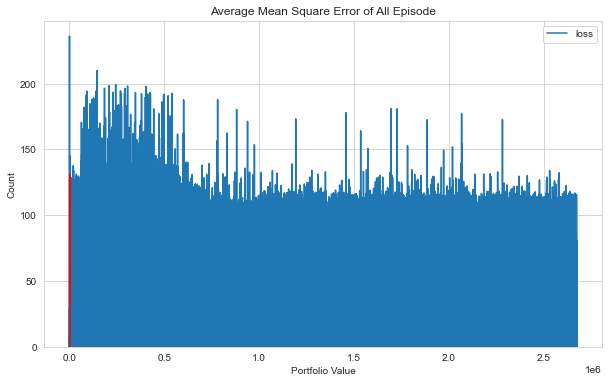

In [5]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

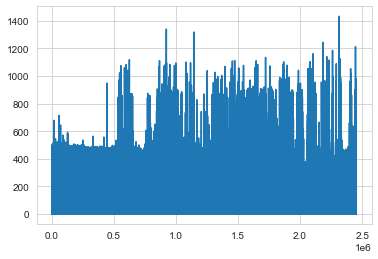

In [5]:
plt.plot(agent.model.losses)

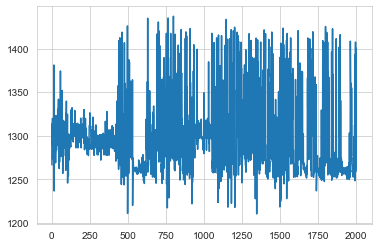

In [6]:
plt.plot(portfolio_value)

episode end value: 1055.77, duration: 0:00:00.175045
Sell: 718 times, Buy: 617 times


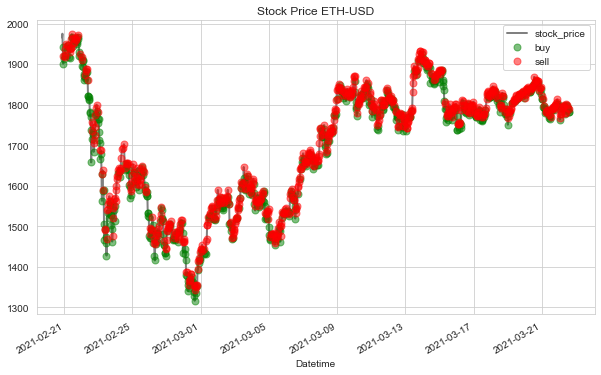

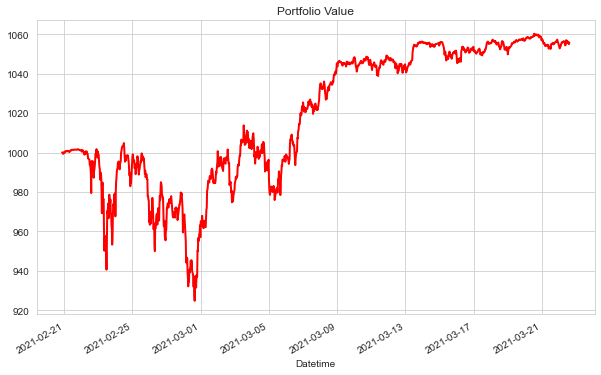

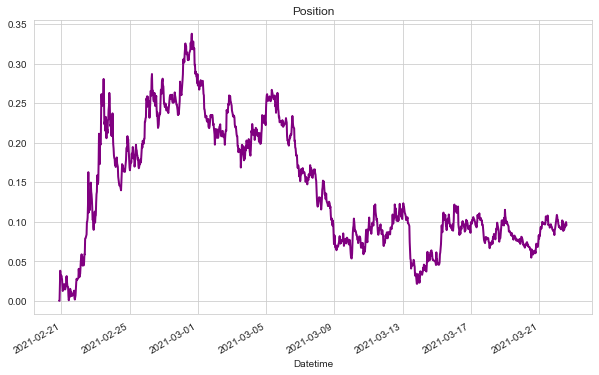

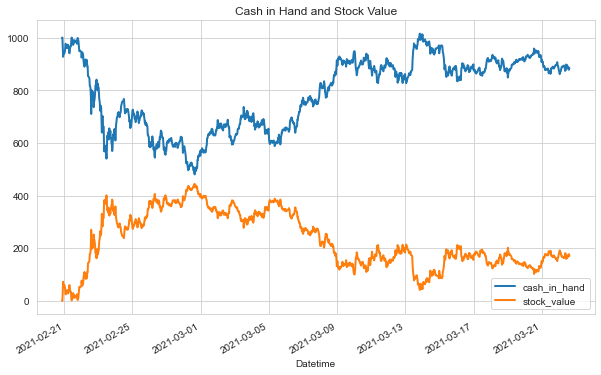

In [4]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [5]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: ETH-USD
Start: 2021-02-20 21:00:00+00:00  End: 2021-03-22 14:30:00+00:00
Compound Annual Growth Rate: 1.03 %
Volatility: 0.0417
shape ratio: -0.0173
Maximun drawdown: -7.96 %
Calmar ratio: 0.1291
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -1.76 %
Volatility (benchmark): 0.1351
shape ratio: -0.2118
Maximun drawdown: -33.34 %
Calmar ratio (benchmark): -0.0529


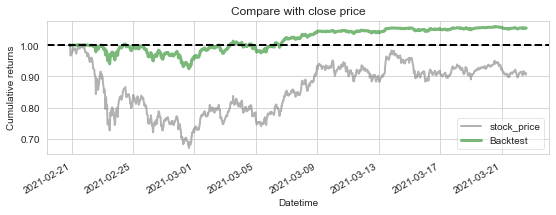

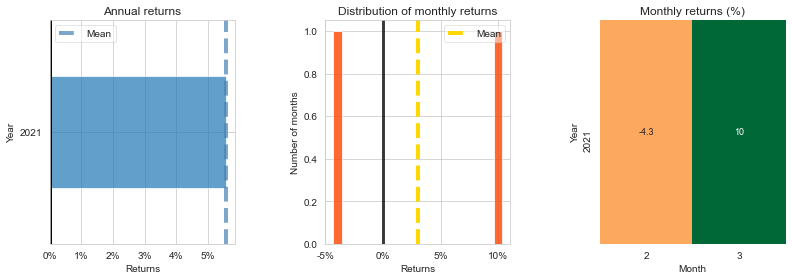

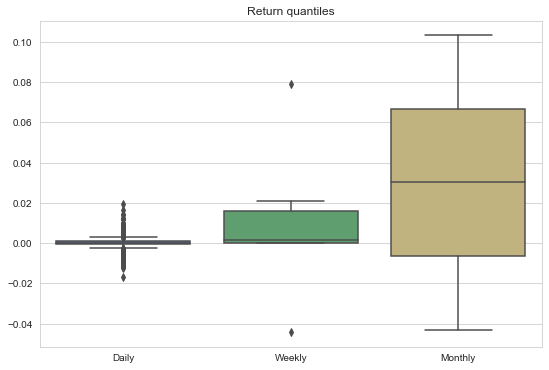

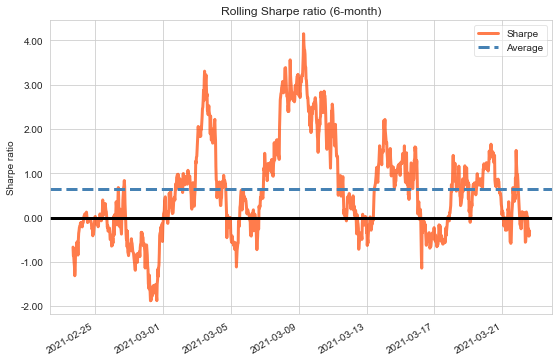

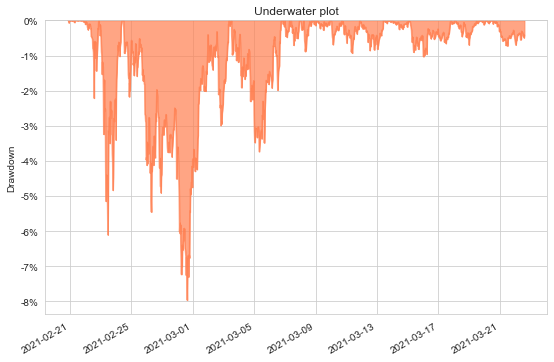

In [6]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')